### Logistic Regression - update- Amrita

Link to dataset:
https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression/data

Link to original notebook:
https://www.kaggle.com/code/aryantyagi19/predict-heart-disease-logistic-regression#Logistic-Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier

In [28]:
df = pd.read_csv("data/framingham.csv")

In [29]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [47]:
# Define columns that have missing data
cols_missing = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# Create the imputer (using the median strategy)
imputer = SimpleImputer(strategy='median')

# Impute missing values for the selected columns
df[cols_missing] = imputer.fit_transform(df[cols_missing])


In [48]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4.238000e+03,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4.238000e+03,4.238000e+03,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,1.307747e-16,0.000511,0.494101,-0.005204,0.029259,0.005899,0.310524,0.025720,-0.000622,-3.872944e-16,7.880016e-17,-0.000375,-0.000015,-0.013746,0.151958
std,0.495022,1.000118e+00,0.987656,0.500024,0.998661,0.168552,0.076587,0.462763,0.158316,0.994217,1.000118e+00,1.000118e+00,0.997889,1.000000,0.954221,0.359023
min,0.000000,-2.051644e+00,-0.960068,0.000000,-0.760561,0.000000,0.000000,0.000000,0.000000,-2.715230,-2.345058e+00,-2.638271e+00,-2.659956,-2.602582,-2.564503,0.000000
25%,0.000000,-8.849392e-01,-0.960068,0.000000,-0.760561,0.000000,0.000000,0.000000,0.000000,-0.709571,-7.223743e-01,-6.790475e-01,-0.694417,-0.666826,-0.617437,0.000000
50%,0.000000,-6.824590e-02,0.020644,0.000000,-0.760561,0.000000,0.000000,0.000000,0.000000,-0.052747,-1.895529e-01,-6.438908e-02,-0.083559,-0.064591,-0.150142,0.000000
75%,1.000000,7.484475e-01,1.001356,1.000000,0.934811,0.000000,0.000000,1.000000,0.000000,0.604077,5.854601e-01,6.271017e-01,0.610896,0.623678,0.395037,0.000000
max,1.000000,2.381834e+00,1.982068,1.000000,3.477868,1.000000,1.000000,1.000000,1.000000,2.633194,2.547212e+00,2.586325e+00,2.574461,2.559434,2.419986,1.000000


In [49]:
def cap_outliers(df, col, multiplier=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Capping the values
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# List the columns you suspect have outliers (adjust as needed)
cols_to_cap = ['cigsPerDay', 'totChol', 'BMI', 'sysBP', 'diaBP', 'heartRate', 'glucose']

for col in cols_to_cap:
    df = cap_outliers(df, col)

print(df[cols_to_cap].describe())


        cigsPerDay      totChol          BMI         sysBP         diaBP  \
count  4238.000000  4238.000000  4238.000000  4.238000e+03  4.238000e+03   
mean     -0.005204    -0.001336    -0.000500 -3.872944e-16  7.880016e-17   
std       0.998661     0.992211     0.997558  1.000118e+00  1.000118e+00   
min      -0.760561    -2.680043    -2.652387 -2.345058e+00 -2.638271e+00   
25%      -0.760561    -0.709571    -0.694417 -7.223743e-01 -6.790475e-01   
50%      -0.760561    -0.052747    -0.083559 -1.895529e-01 -6.438908e-02   
75%       0.934811     0.604077     0.610896  5.854601e-01  6.271017e-01   
max       3.477868     2.574549     2.568866  2.547212e+00  2.586325e+00   

         heartRate      glucose  
count  4238.000000  4238.000000  
mean     -0.000015    -0.037048  
std       1.000000     0.892168  
min      -2.602582    -2.136149  
25%      -0.666826    -0.617437  
50%      -0.064591    -0.150142  
75%       0.623678     0.395037  
max       2.559434     1.913748  


In [50]:
# Define the continuous features to scale. 
cols_to_scale = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform the data
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df[cols_to_scale].head())

        age  education  cigsPerDay   totChol     sysBP     diaBP       BMI  \
0 -1.234951   2.006559   -0.756459 -0.973973 -1.255196 -1.118089  0.331170   
1 -0.418257   0.020387   -0.756459  0.326499 -0.528621 -0.152197  0.795769   
2 -0.184916  -0.972700    0.941387  0.208274 -0.213772 -0.240006 -0.099112   
3  1.331800   1.013473    1.790309 -0.264625  0.876090  1.077119  0.756172   
4 -0.418257   1.013473    1.196063  1.154071 -0.092676  0.111228 -0.690419   

   heartRate   glucose  
0   0.365635 -0.214084  
1   1.656291 -0.301390  
2  -0.064584 -0.825227  
3  -0.925021  2.055879  
4   0.795854  0.484366  


In [51]:
# Correlation matrix
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017205,0.197596,0.315879,-0.051545,-0.004546,0.005313,0.015708,-0.071200,-0.030095,0.063325,0.102312,-0.116487,-0.001098,0.088428
age,-0.028979,1.000000,-0.163547,-0.213748,-0.193645,0.120955,0.057655,0.307194,0.101258,0.269226,0.397920,0.206682,0.137018,-0.014283,0.120069,0.225256
education,0.017205,-0.163547,1.000000,0.018273,0.008041,-0.010365,-0.035150,-0.081021,-0.038136,-0.022037,-0.129073,-0.060799,-0.132060,-0.052507,-0.026354,-0.053383
currentSmoker,0.197596,-0.213748,0.018273,1.000000,0.765436,-0.048358,-0.032988,-0.103260,-0.044295,-0.049416,-0.130087,-0.107686,-0.170351,0.066365,-0.066862,0.019456
cigsPerDay,0.315879,-0.193645,0.008041,0.765436,1.000000,-0.044683,-0.032376,-0.066566,-0.036099,-0.027134,-0.088021,-0.055622,-0.091968,0.077568,-0.080655,0.059452
BPMeds,-0.051545,0.120955,-0.010365,-0.048358,-0.044683,1.000000,0.114609,0.258697,0.051394,0.079891,0.243111,0.191711,0.093182,0.011255,0.012339,0.086417
prevalentStroke,-0.004546,0.057655,-0.035150,-0.032988,-0.032376,0.114609,1.000000,0.074830,0.006949,0.002128,0.060398,0.048341,0.012120,-0.017436,0.006779,0.061810
prevalentHyp,0.005313,0.307194,-0.081021,-0.103260,-0.066566,0.258697,0.074830,1.000000,0.077808,0.160452,0.713008,0.622958,0.296577,0.147003,0.084638,0.177603
diabetes,0.015708,0.101258,-0.038136,-0.044295,-0.036099,0.051394,0.006949,0.077808,1.000000,0.033029,0.103138,0.046139,0.079312,0.049339,0.270524,0.097317
totChol,-0.071200,0.269226,-0.022037,-0.049416,-0.027134,0.079891,0.002128,0.160452,0.033029,1.000000,0.213093,0.174874,0.130529,0.088335,0.037241,0.079056


<Axes: >

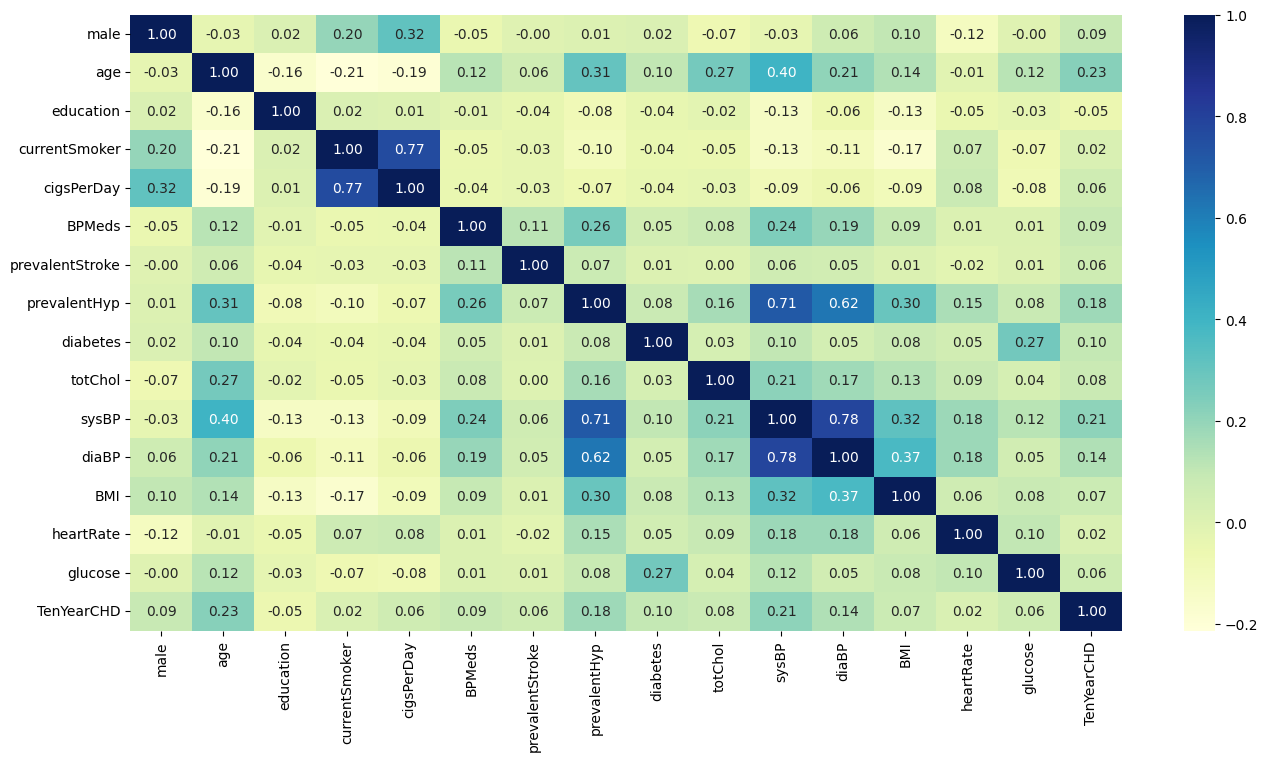

In [52]:
plt.figure(figsize= (16, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

### Improved Logistic regression

In [53]:
# Making a copy of dataframe for easy access
df1 = df.copy()

In [54]:
# Drop features based on correlation and domain knowledge
features_to_drop = ['education', 'heartRate', 'male']  # Drop 'education', 'heartRate', and 'male'
df1 = df1.drop(columns=features_to_drop)

df1 = df1.drop(columns=['sysBP'])  # Dropping 'sysBP' since it's correlated with 'BMI'


In [ ]:
# Splitting the dataset and training the model
X = df1.drop(columns='TenYearCHD')
y = df1['TenYearCHD']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression on the modified feature set
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Predict labels for training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')

Training Accuracy: 0.8504
Testing Accuracy: 0.8573
